<a href="https://colab.research.google.com/github/csonkam/OTS-egyeni/blob/main/Teszt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-23-99fe01c26fc8>:87: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  z2 = odeint(hocserelo_modell2,z2,tspan,args=(u1[i],u2[i]),hmax=0.6)


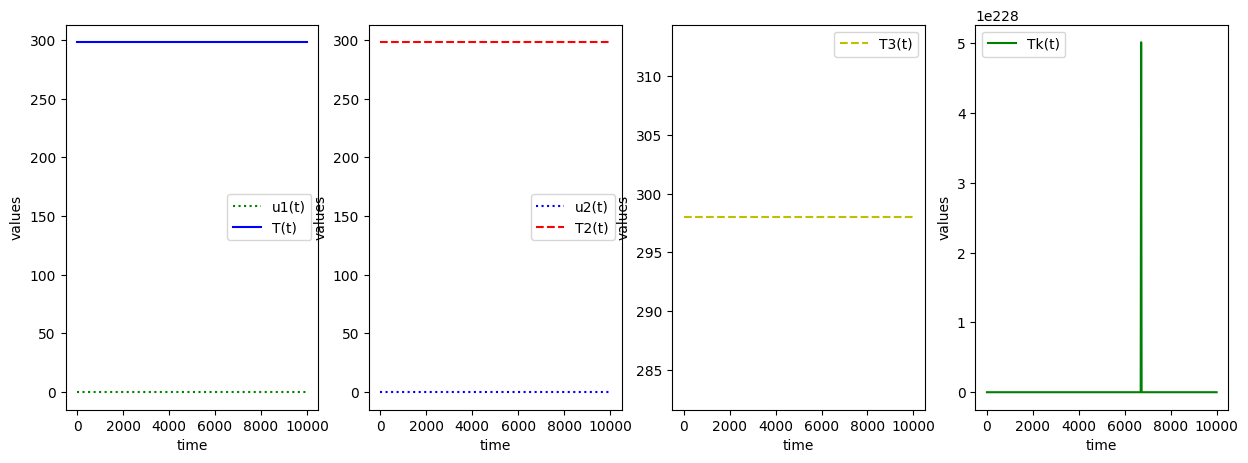

In [23]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
# Alap adatok
B=22/3600 #0.01/3600 #m^3/s
rho=1000 #kg/m^3
cp=4180 #J/(kgK)
Vh=0.007 #m^3
Vg=0.0026 #m^3
V=0.0007 #m^3
alfa=250 #0.01 #W/(m^2K)
Ah=5.3 #m^2
Ag=3.1 #m^2
Tm=263 #K,-10C°
Tg=432 #K, 159C°
Tbe=298 #K
T0=Tbe #298 #K
def hocserelo_modell(y0, t, u1):
    T1=y0[0]
    dT1_dt=(B/Vh*(u1/100)*(Tr[i]-T1)+alfa*Ah*(Tm-T1))/(Vh*rho*cp)
    #dT_dt=B*(u1/100)*rho*cp*(Tbe-T)+(alfa*A/(V*rho*cp))*(Tm-T)
    return dT1_dt
def hocserelo_modell1(y1, t, u1, u2):
    T2=y1[0]
    dT2_dt=(B/Vg*((100-u1)/100)*(u2/100)*(Tr[i]-T2)+alfa*Ag*(Tg-T2))/(Vg*rho*cp)
    return dT2_dt
def hocserelo_modell2(y2, t, u1, u2):
    T3=y2[0]
    dT3_dt=B/V*((100-u1)/100)*((100-u2)/100)*(Tr[i]-T3)
    return dT3_dt
Vr=0.6 #m^3
Ah=4 #m^2
Trr=300 #K
def Reaktor(y3, t):
    Tr=y3[0]
    dTr_dt=(B/Vr*(Tk[i]-Tr)+alfa*Ah*(Trr-Tr))/(Vr*rho*cp)
    return dTr_dt
n=500 #s időpontok
t=np.linspace(0,10000,n)
z0=T0
z1=T0
z2=T0
z3=T0
#result=odeint(hocserelo_modell, t_span, x0, hmax=0.01)
# step input
u1 = np.zeros(n)
u2 = np.zeros(n)
u3 = np.zeros(n)
# change to 20 at time = 5.0
#u1[50:] = 10
#u1[100:]= 0
#u2[100:] = 10


# store solution
T1 = np.empty_like(t)
T2 = np.empty_like(t)
T3 = np.empty_like(t)
Tk = np.empty_like(t)
Q1 = np.empty_like(t)
Q2 = np.empty_like(t)
Q3 = np.empty_like(t)
Q4 = np.empty_like(t)

Tr = np.empty_like(t)
# record initial conditions
T1[0] = z0
T2[0] = z1
T3[0]= z2
Tk[0]=T0
Q1[0]=0
Q2[0]=0
Q3[0]=B
Q4[0]=B

Tr[0]=T0

# solve ODE
for i in range(1,n):

    # span for next time step
    tspan = [t[i-1],t[i]]

    # solve for next step
    z = odeint(hocserelo_modell,z0,tspan,args=(u1[i],),hmax=0.6)
    z1 = odeint(hocserelo_modell1,z1,tspan,args=(u1[i],u2[i]),hmax=0.6)
    z2 = odeint(hocserelo_modell2,z2,tspan,args=(u1[i],u2[i]),hmax=0.6)

    z3 = odeint(Reaktor,z3,tspan,hmax=0.6)
    # calculate Tk
      #Tk[i]=(B*u1[i]/100*z[1][0]+B*((100-u1[i])/100)*u2[i]/100*z1[1][0]+B*((100-u1[i])/100)*(100-u2[i])/100*z2[1][0])/B
    Q1[i]=B*u1[i]/100
    Q2[i]=B*((100-u1[i])/100)*u2[i]/100
    Q3[i]=B*((100-u1[i])/100)*(100-u2[i])/100
    Q4[i]=Q1[i]+Q2[i]+Q3[i]
    Tk[i]=(Q1[i]*z[1][-1]+Q2[i]*z1[1][-1]+Q3[i]*z2[1][-1])/Q4[i]


    # store solution for plotting
    if u1[i]>0 and u2[i]>0:
      T1[i] = z[1][-1]
      T2[i] = z1[1][-1]
      T3[i] = z2[1][-1]
      Tr[i] = z3[1][-1]
    elif u1[i]==0 and u2[i]>0:
      T1[i] = Tbe
      T2[i] = z1[1][-1]
      T3[i] = z2[1][-1]
      Tr[i] = z3[1][-1]
    elif u1[i]>0 and u2[i]==0:
      T1[i] = z[1][-1]
      T2[i] = Tbe
      T3[i] = z2[1][-1]
      Tr[i] = z3[1][-1]
    elif u1[i]==0 and u2[i]==0:
      T1[i] = Tbe
      T2[i] = Tbe
      T3[i] = Tbe
      Tr[i] = z3[1][-1]
    # next initial condition
    #print(z1)
    z0 = z[1][-1]
    z1 = z1[1][-1]
    z2 = z2[1][-1]
    z3 = z3[1][-1]


# plot results
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.plot(t,u1,'g:',label='u1(t)')
plt.plot(t,T1,'b-',label='T(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(142)
plt.plot(t,u2,'b:',label='u2(t)')
plt.plot(t,T2,'r--',label='T2(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(143)
plt.plot(t,T3,'y--',label='T3(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(144)
plt.plot(t,Tk,'g-',label='Tk(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

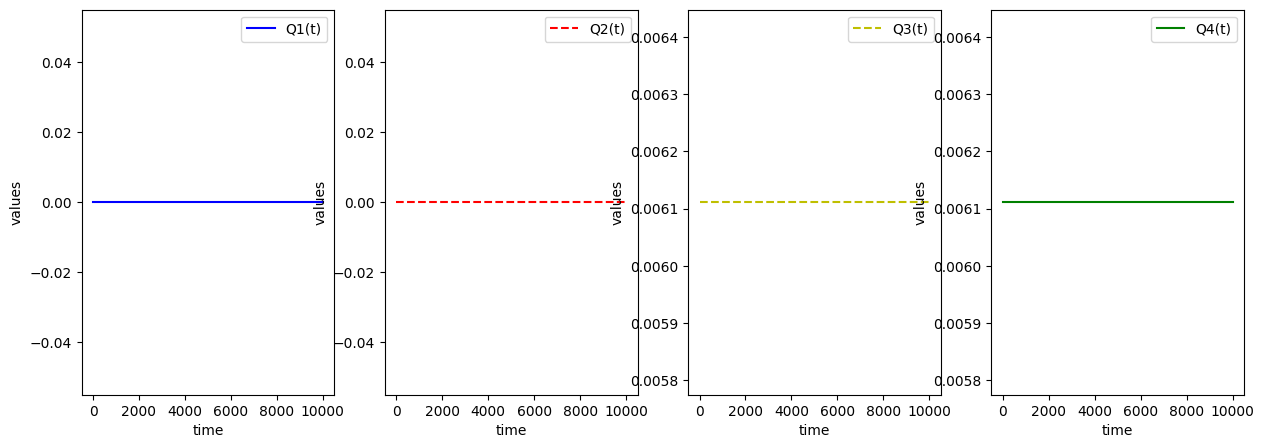

In [24]:
# plot results
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.plot(t,Q1,'b-',label='Q1(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(142)
plt.plot(t,Q2,'r--',label='Q2(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(143)
plt.plot(t,Q3,'y--',label='Q3(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.subplot(144)
plt.plot(t,Q4,'g-',label='Q4(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

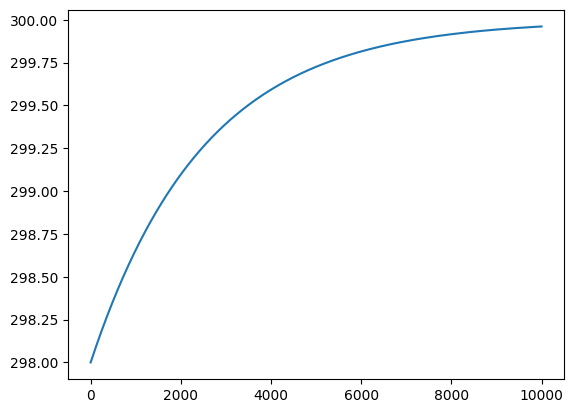

In [25]:
plt.plot(t,Tr)